In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
#Reading dataset
df = pd.read_csv("FuelConsumptionCo2.csv")

(0.0, 507.0)

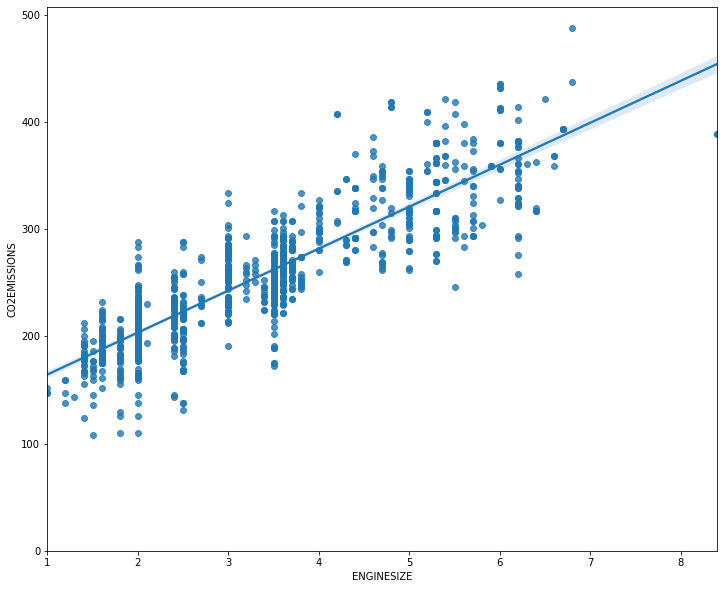

In [3]:
#Plotting regression line
plt.figure(figsize=(12,10))
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data =df)
plt.ylim(0,)

# Overfitting

In [4]:
X=df[['ENGINESIZE']] #settin independent variable
Y=df['CO2EMISSIONS'] #setting dependent variable
deg=300
Poly=PolynomialFeatures(degree=deg)
X_Poly=Poly.fit_transform(X)
X_Poly

array([[1.00000000e+000, 2.00000000e+000, 4.00000000e+000, ...,
        5.09258994e+089, 1.01851799e+090, 2.03703598e+090],
       [1.00000000e+000, 2.40000000e+000, 5.76000000e+000, ...,
        2.00886166e+113, 4.82126798e+113, 1.15710432e+114],
       [1.00000000e+000, 1.50000000e+000, 2.25000000e+000, ...,
        2.98672473e+052, 4.48008710e+052, 6.72013065e+052],
       ...,
       [1.00000000e+000, 3.00000000e+000, 9.00000000e+000, ...,
        1.52101643e+142, 4.56304930e+142, 1.36891479e+143],
       [1.00000000e+000, 3.20000000e+000, 1.02400000e+001, ...,
        3.42525997e+150, 1.09608319e+151, 3.50746621e+151],
       [1.00000000e+000, 3.20000000e+000, 1.02400000e+001, ...,
        3.42525997e+150, 1.09608319e+151, 3.50746621e+151]])

In [9]:
plr=LinearRegression(normalize=True)
plr.fit(X_Poly,Y)

LinearRegression(normalize=True)

(0.0, 9.0)

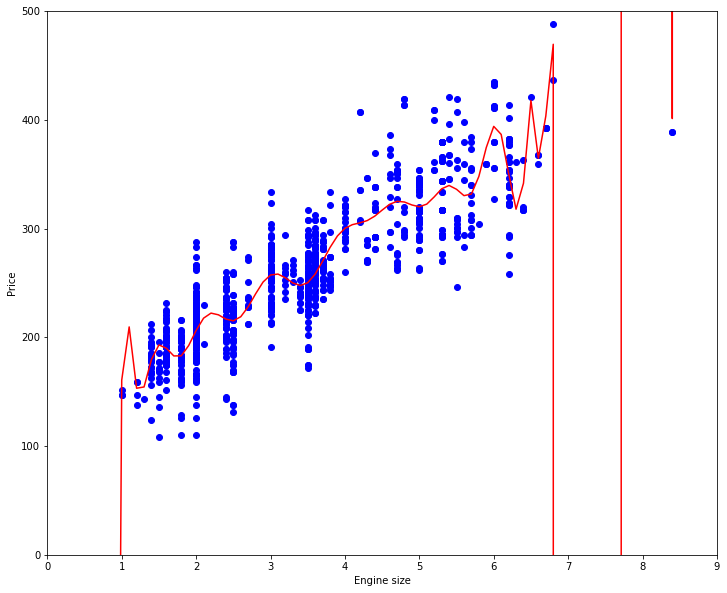

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(X,Y,color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy=0
for i in range (deg+1):
    yy_ =   plr.coef_[i]*np.power(XX, i)
    yy = yy + yy_
yy = yy + plr.intercept_
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.ylim(0,500)
plt.xlim(0,9)